# Implementación de un algoritmo para encontrar el camino con menos movimientos que puede tomar un caballo en un tablero de ajedrez

### Librerias a utilizar

In [1]:
from queue import SimpleQueue
import numpy as np
import matplotlib.pyplot as plt

### Posición inicial del caballo
la variable pos marca la posición de inicio del caballo en el tablero

In [2]:
pos = (2, 3)

### Incialización
Este segmento de codigo inicializa la cola del algoritmo BFS y un diccionario que contendrá el padre de cada casilla y su nivel.
horseMoves guarda las formas en las que el caballo se puede mover desde una casilla

In [3]:
vertexQueue = SimpleQueue()
vertexQueue.put(pos)
                                    #    - - - 0 1 2 3
                                    #  3 * * * * * * *
horseMoves = ((2, -1), (2, 1),      #  2 * * X * X * *
              (-2, -1), (-2, 1),    #  1 * X * * * X *
              (1, 2), (-1, 2),      #  0 * * * H * * *
              (1, -2), (-1, -2))    # -1 * X * * * X *
                                    # -2 * * X * X * *
                                    # -3 * * * * * * *
gridData = {pos : [None, 0]} # parent, l(distancia del vertice a el vertice inicial)

### Implementación de BFS
Esta es una implementación de BFS algo simplificada (solo no sinteresa saber si ya pasamos por un vertice, su nivel y su padre)

In [4]:
while not vertexQueue.empty():
    currentVertex = vertexQueue.get()
    for i in horseMoves: # Recorre la lista de movimientos del caballo desde la casilla
        if(currentVertex[0]+i[0] >= 0 and currentVertex[1]+i[1] >= 0 # Revisa que el movimiento sea valido (quue esté dentro del tablero)
        and currentVertex[0]+i[0] < 8 and currentVertex[1]+i[1] < 8  # ----------
        and (currentVertex[0]+i[0], currentVertex[1]+i[1]) not in gridData): # Si el vertice está en el diccionario, significa que ya pasamos por el
            gridData[(currentVertex[0]+i[0], currentVertex[1]+i[1])] = [currentVertex, gridData[currentVertex][1] + 1]  # Información correspondiente a cada vertice
                                                                                                                        # deacuerdo con el algoritmo
            vertexQueue.put((currentVertex[0]+i[0], currentVertex[1]+i[1])) # Agregamos el vertice a la fila

gridData # Ver el resultado de cada vertice con su correspondiente padre

{(2, 3): [None, 0],
 (4, 2): [(2, 3), 1],
 (4, 4): [(2, 3), 1],
 (0, 2): [(2, 3), 1],
 (0, 4): [(2, 3), 1],
 (3, 5): [(2, 3), 1],
 (1, 5): [(2, 3), 1],
 (3, 1): [(2, 3), 1],
 (1, 1): [(2, 3), 1],
 (6, 1): [(4, 2), 2],
 (6, 3): [(4, 2), 2],
 (2, 1): [(4, 2), 2],
 (5, 4): [(4, 2), 2],
 (3, 4): [(4, 2), 2],
 (5, 0): [(4, 2), 2],
 (3, 0): [(4, 2), 2],
 (6, 5): [(4, 4), 2],
 (2, 5): [(4, 4), 2],
 (5, 6): [(4, 4), 2],
 (3, 6): [(4, 4), 2],
 (5, 2): [(4, 4), 2],
 (3, 2): [(4, 4), 2],
 (1, 4): [(0, 2), 2],
 (1, 0): [(0, 2), 2],
 (1, 6): [(0, 4), 2],
 (1, 2): [(0, 4), 2],
 (4, 7): [(3, 5), 2],
 (2, 7): [(3, 5), 2],
 (4, 3): [(3, 5), 2],
 (0, 7): [(1, 5), 2],
 (0, 3): [(1, 5), 2],
 (4, 0): [(6, 1), 3],
 (7, 3): [(6, 1), 3],
 (5, 3): [(6, 1), 3],
 (7, 5): [(6, 3), 3],
 (5, 5): [(6, 3), 3],
 (7, 1): [(6, 3), 3],
 (5, 1): [(6, 3), 3],
 (0, 0): [(2, 1), 3],
 (3, 3): [(2, 1), 3],
 (1, 3): [(2, 1), 3],
 (6, 6): [(5, 4), 3],
 (4, 6): [(5, 4), 3],
 (6, 2): [(5, 4), 3],
 (2, 6): [(3, 4), 3],
 (2, 2): [(3

### Función para convertir las casillas del tablero en algo utilizable por matplotlib.scatter
Actualmente no se utiliza, porque fué reemplazada por imshow que da mejores resultados (esta función se puede ver implementada en anteriores commits)

In [5]:
def getTreeLevels(treeData : dict): # Convierte el diccionario en arreglos de numpy con las posiciones x e y de los puntos en cada nivel del arbol BFS
    depth = max(treeData.items(), key = lambda x : x[1][1])[1][1] # Encontramos el numero de niveles
    levels = [] # Aquí guardamos los puntos
    for i in range(depth + 1):
        x = []
        y = []
        for j in treeData.items():
            if j[1][1] == i: # Si el punto que estamos procesando está en el nivel actual i, guarda sus componentes en los arreglos x e y
                x.append(j[0][0])
                y.append(j[0][1])
        levels.append((np.array(x), np.array(y))) # Guarda los arreglos de numpy con las posiciones (para el nivel actual)
    return(levels)

BFSlevels = getTreeLevels(gridData)
BFSlevels # Arreglo que guarda los puntos por nivel (no usado)

[(array([2]), array([3])),
 (array([4, 4, 0, 0, 3, 1, 3, 1]), array([2, 4, 2, 4, 5, 5, 1, 1])),
 (array([6, 6, 2, 5, 3, 5, 3, 6, 2, 5, 3, 5, 3, 1, 1, 1, 1, 4, 2, 4, 0, 0]),
  array([1, 3, 1, 4, 4, 0, 0, 5, 5, 6, 6, 2, 2, 4, 0, 6, 2, 7, 7, 3, 7, 3])),
 (array([4, 7, 5, 7, 5, 7, 5, 0, 3, 1, 6, 4, 6, 2, 2, 7, 5, 0, 3, 1, 6, 2,
         6, 2]),
  array([0, 3, 3, 5, 5, 1, 1, 0, 3, 3, 6, 6, 2, 6, 2, 7, 7, 6, 7, 7, 4, 4,
         0, 0])),
 (array([7, 7, 4, 4, 6, 7, 7, 0, 0]), array([2, 4, 5, 1, 7, 6, 0, 5, 1]))]

### Colores
Para diferenciar cada paso que puede dar el caballo

In [6]:
def getHexFromGradientRgb(iColor,  eColor, gradient):   # Función no usada
                                                        # gradient, que va de 0 a 1 se utiliza para interpolar 2 colores y se devuelve un string
                                                        # con los valores en hexadecimal
    return "#{:02x}{:02x}{:02x}".format(int(iColor[0]*(1. - gradient) + eColor[0]*gradient), 
                                        int(iColor[1]*(1. - gradient) + eColor[1]*gradient),
                                        int(iColor[2]*(1. - gradient) + eColor[2]*gradient))

def getGradientRgb(iColor,  eColor, gradient):  # Interpola los colores como en getHexFromGradientRgb, pero devuelve una tupla (R, G, B)
    return (int(iColor[0]*(1. - gradient) + eColor[0]*gradient), 
            int(iColor[1]*(1. - gradient) + eColor[1]*gradient),
            int(iColor[2]*(1. - gradient) + eColor[2]*gradient))

### Grafico de las posiciones del caballo

El color mas brillante indica la posicion inicial y disminuye con respecto al numero de movimientos necesarios para llegar a cada casilla

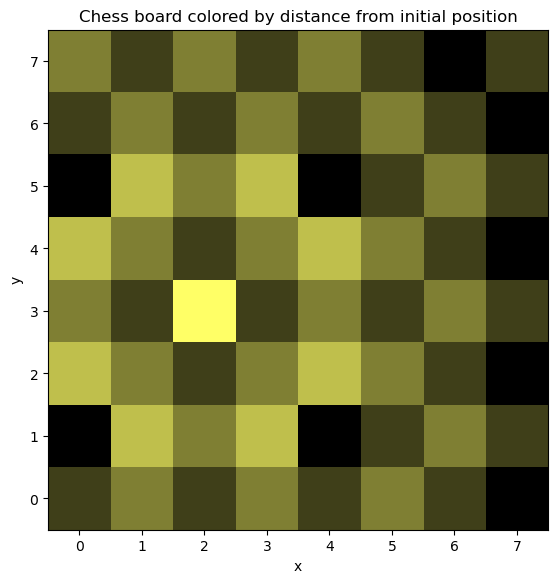

In [7]:
fig=plt.figure(figsize=(5,5))
ax=fig.add_axes([0,0,1,1])
BFSDepth = max(gridData.items(), key = lambda x : x[1][1])[1][1]
# Guardar en una imagen los valores de color de cada casilla dependiendo del numero de movimientos para llegar a esta desde el punto mas brillante
chessBoard = np.array([[getGradientRgb((255, 255, 102), (0, 0, 0), gridData[(j,i)][1]/BFSDepth)  for j in range(8)] for i in range(8)])
# Mostrar con matplotlib
ax.imshow(chessBoard)
ax.invert_yaxis()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Chess board colored by distance from initial position')
plt.show()

### Calculo del camino a la posición final del caballo

In [8]:
endPos = (7,7) # Variable que guarda la posición final deceada del caballo

### Genenración del camino
Este fragmento de codigo se devuelve recursivamente desde el vertice final hacia el vertice inicial usando su padre guardado en el diccionario

In [9]:
currentVertex = endPos
path = [None for i in range(gridData[currentVertex][1]+1)] # Arreglo del tamaño del camino (Por las propiedades de BFS es l)
while currentVertex != None: # Se rellena el arreglo empezando en el ultimo elemento y terminando en el vertice inicial
    path[gridData[currentVertex][1]] = currentVertex
    currentVertex = gridData[currentVertex][0]

path

[(2, 3), (4, 4), (6, 5), (7, 7)]

### Mostramos el camino del caballo sobrepuesto con las posiciones (mas oscuro a mayor cantidad de movimientos utilizados para llegar)

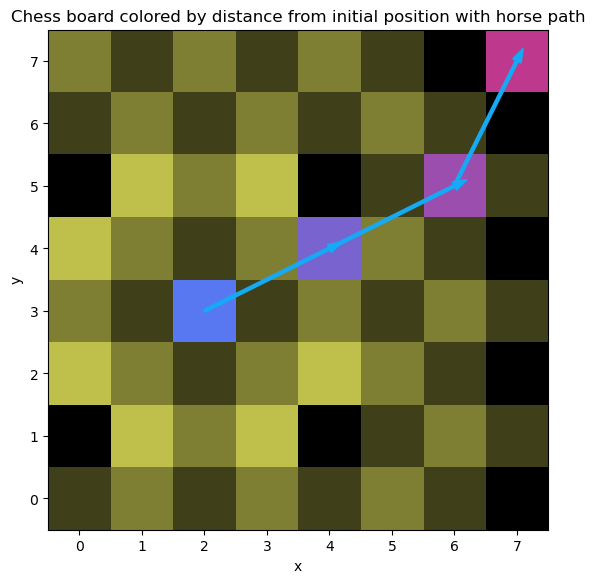

In [10]:
fig=plt.figure(figsize=(5,5))
ax=fig.add_axes([0,0,1,1])
BFSDepth = max(gridData.items(), key = lambda x : x[1][1])[1][1]
chessBoard = np.array([[getGradientRgb((255, 255, 102), (0, 0, 0), gridData[(j,i)][1]/BFSDepth)  for j in range(8)] for i in range(8)])

# Pintar las casillas por las que pasa el caballo
for i in range(len(path)):
    chessBoard[path[i][1]][path[i][0]] = getGradientRgb((87, 120, 240), (190, 57, 141), i/(len(path) - 1))

ax.imshow(chessBoard)

# Flechas indicando la dirección del caballo
for i in range(len(path) - 1):
    ax.arrow(path[i][0], path[i][1], path[i+1][0] - path[i][0], path[i+1][1] - path[i][1], width = 0.05, color="#14aaf5")

# Mostrar la imagen
ax.invert_yaxis()

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Chess board colored by distance from initial position with horse path')
plt.show()

### Imagen final con el camino del caballo
En esta ya no es utilizan los colores de distancias, solo el tablero y el camino del caballo

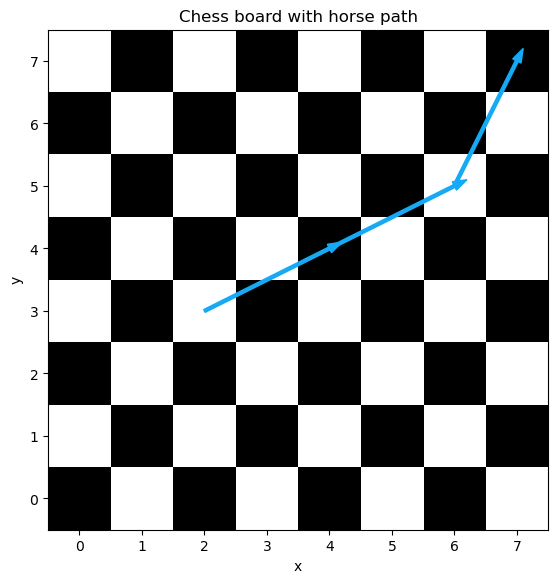

In [11]:
fig=plt.figure(figsize=(5,5))
ax=fig.add_axes([0,0,1,1])
BFSDepth = len(BFSlevels)
# Solo creamos un tablero a cuadros
chessBoard = np.array([[(i + j) % 2  for j in range(8)] for i in range(8)])
ax.imshow(chessBoard, cmap='gray') 

# Mostramos el camino del caballo con flechas
for i in range(len(path) - 1):
    ax.arrow(path[i][0], path[i][1], path[i+1][0] - path[i][0], path[i+1][1] - path[i][1], width = 0.05, color="#14aaf5")

ax.invert_yaxis()

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Chess board with horse path')
plt.show()

### Implementamos todo
Esta función permite correr todo lo visto anteriomente en una sola linea de codigo

In [12]:
def getHorseShortestPathInChessboard8x8(pos, endPos):
    vertexQueue = SimpleQueue()
    vertexQueue.put(pos)
                                        #    - - - 0 1 2 3
                                        #  3 * * * * * * *
    horseMoves = ((2, -1), (2, 1),      #  2 * * X * X * *
                (-2, -1), (-2, 1),      #  1 * X * * * X *
                (1, 2), (-1, 2),        #  0 * * * H * * *
                (1, -2), (-1, -2))      # -1 * X * * * X *
                                        # -2 * * X * X * *
                                        # -3 * * * * * * *
    gridData = {pos : [None, 0]} # read, parent, l

    # Calcular caminos
    while not vertexQueue.empty():
        currentVertex = vertexQueue.get()
        for i in horseMoves:
            if(currentVertex[0]+i[0] >= 0 and currentVertex[1]+i[1] >= 0
            and currentVertex[0]+i[0] < 8 and currentVertex[1]+i[1] < 8
            and (currentVertex[0]+i[0], currentVertex[1]+i[1]) not in gridData):
                gridData[(currentVertex[0]+i[0], currentVertex[1]+i[1])] = [currentVertex, gridData[currentVertex][1] + 1]
                vertexQueue.put((currentVertex[0]+i[0], currentVertex[1]+i[1]))

    # Calcular camino al vertice
    currentVertex = endPos
    path = [None for i in range(gridData[currentVertex][1]+1)]
    while currentVertex != None:
        path[gridData[currentVertex][1]] = currentVertex
        currentVertex = gridData[currentVertex][0]
    
    print("camino mas rapido del vetice inicial al vertice final: ", path)

    # Graficas
    fig, ax = plt.subplots(3, figsize=(25, 25))

    # Ajedrez coloreado
    # ax[0]=fig.add_axes([0,0,1,1])
    BFSDepth = max(gridData.items(), key = lambda x : x[1][1])[1][1]
    chessBoard = np.array([[getGradientRgb((255, 255, 102), (0, 0, 0), gridData[(j,i)][1]/BFSDepth)  for j in range(8)] for i in range(8)])
    ax[0].imshow(chessBoard)
    ax[0].invert_yaxis()
    ax[0].set_xlabel('x')
    ax[0].set_ylabel('y')
    ax[0].set_title('Chess board colored by distance from initial position')

    # Ajedrez coloreado con camino
    # ax[1]=fig.add_axes([0,0,1,1])
    BFSDepth = max(gridData.items(), key = lambda x : x[1][1])[1][1]
    chessBoard = np.array([[getGradientRgb((255, 255, 102), (0, 0, 0), gridData[(j,i)][1]/BFSDepth)  for j in range(8)] for i in range(8)])
    for i in range(len(path)):
        chessBoard[path[i][1]][path[i][0]] = getGradientRgb((87, 120, 240), (190, 57, 141), i/(len(path) - 1))
    ax[1].imshow(chessBoard)
    for i in range(len(path) - 1):
        ax[1].arrow(path[i][0], path[i][1], path[i+1][0] - path[i][0], path[i+1][1] - path[i][1], width = 0.05, color="#14aaf5")
    ax[1].invert_yaxis()
    ax[1].set_xlabel('x')
    ax[1].set_ylabel('y')
    ax[1].set_title('Chess board colored by distance from initial position with horse path')

    # Ajedrez con camino
    # ax[2]=fig.add_axes([0,0,1,1])
    BFSDepth = len(BFSlevels)
    chessBoard = np.array([[(i + j) % 2  for j in range(8)] for i in range(8)])
    ax[2].imshow(chessBoard, cmap='gray') 

    for i in range(len(path) - 1):
        ax[2].arrow(path[i][0], path[i][1], path[i+1][0] - path[i][0], path[i+1][1] - path[i][1], width = 0.05, color="#14aaf5")

    ax[2].invert_yaxis()

    ax[2].set_xlabel('x')
    ax[2].set_ylabel('y')
    ax[2].set_title('Chess board with horse path')

    plt.show()

### Ejemplos

### inicio (2,3), final (7,7)

camino mas rapido del vetice inicial al vertice final:  [(2, 3), (4, 4), (6, 5), (7, 7)]


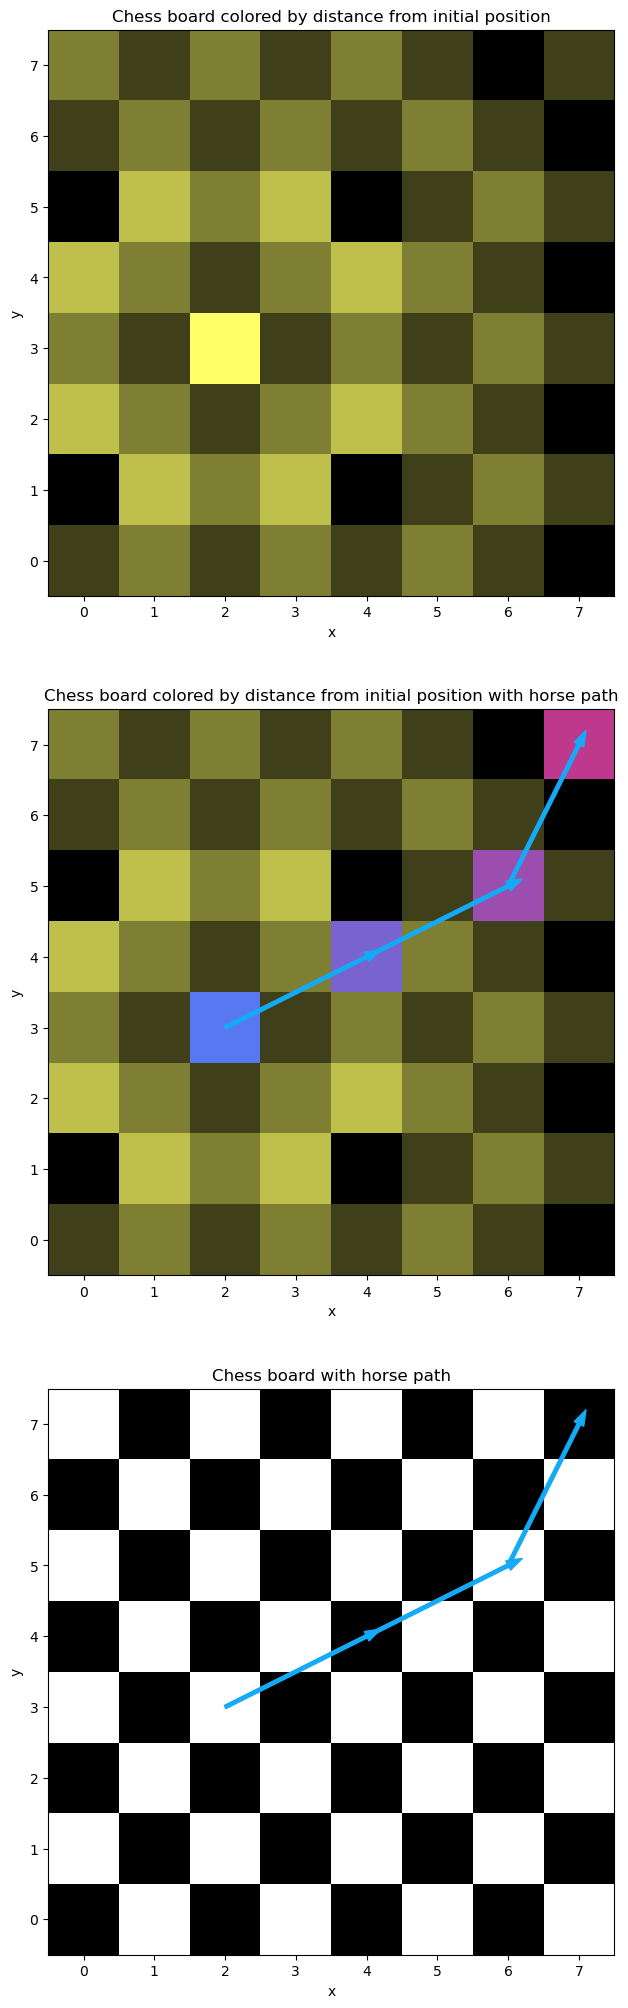

In [13]:
getHorseShortestPathInChessboard8x8((2,3), (7,7))

### Inicio (3, 3), Final (2, 2)

camino mas rapido del vetice inicial al vertice final:  [(3, 3), (1, 4), (2, 2)]


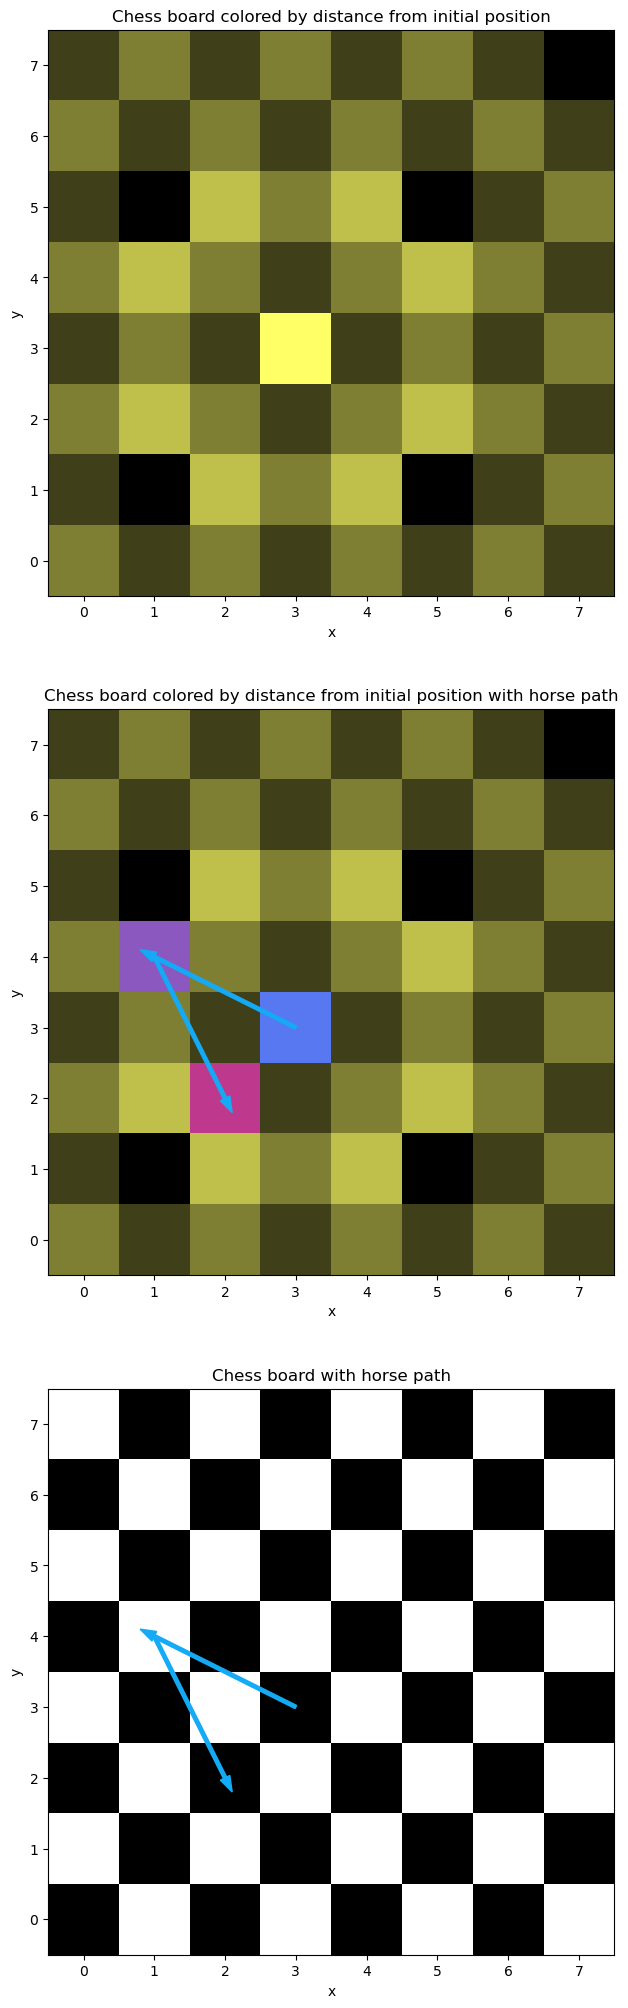

In [14]:
getHorseShortestPathInChessboard8x8((3,3), (2,2))

### Inicio (0, 0), final (0,7)

camino mas rapido del vetice inicial al vertice final:  [(0, 0), (2, 1), (4, 2), (2, 3), (1, 5), (0, 7)]


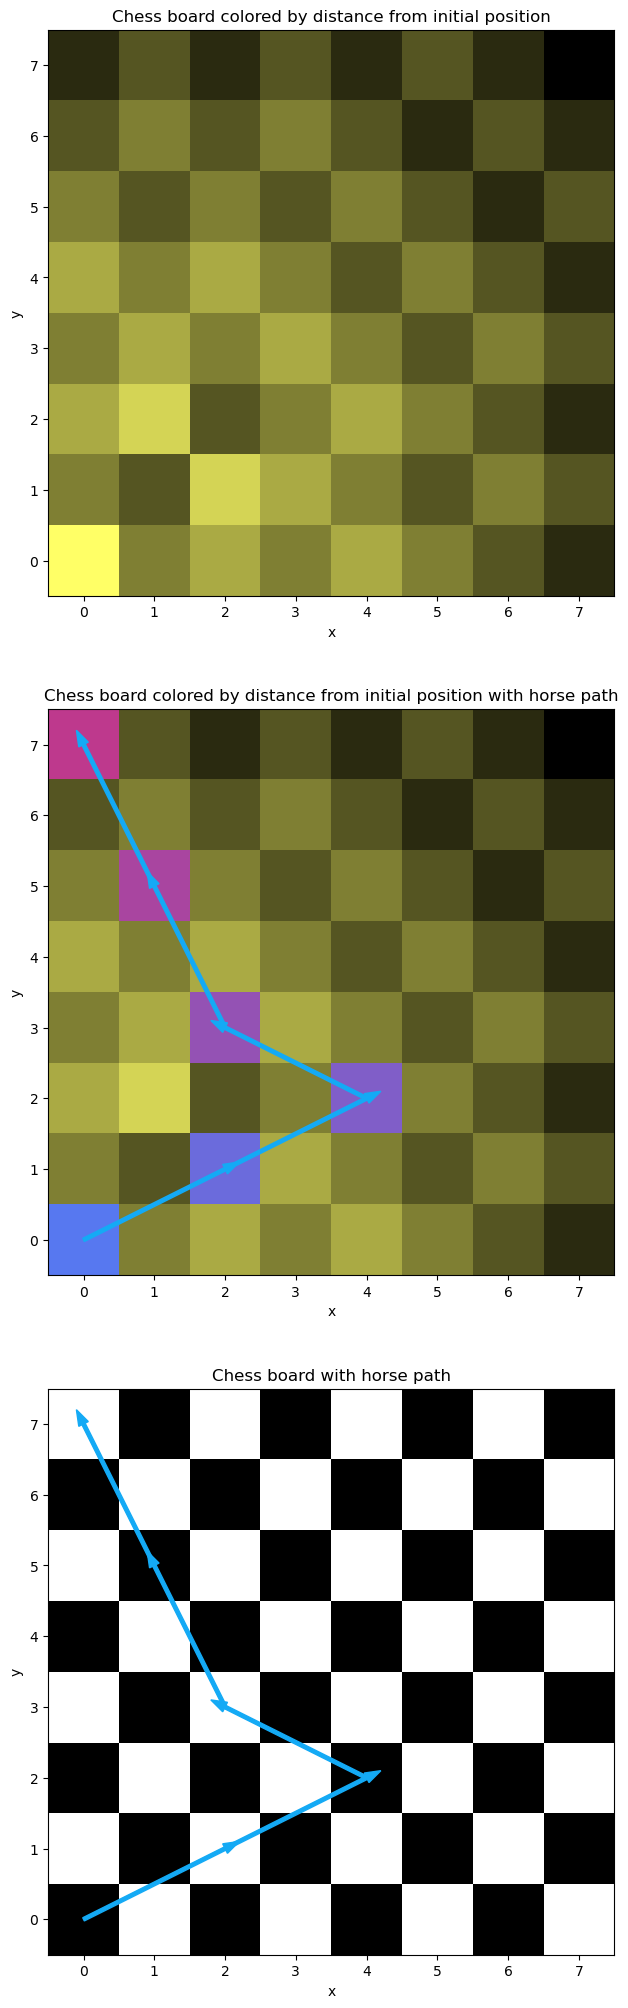

In [15]:
getHorseShortestPathInChessboard8x8((0,0), (0,7))